# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [3]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/Zwelious/DM_W2/refs/heads/main/penguins_size.csv')
df.sample(10)

# In this code, im importing the dataset that i have uploaded to github.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,FEMALE
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
180,Chinstrap,Dream,46.4,17.8,191.0,3700.0,FEMALE
68,Adelie,Torgersen,35.9,16.6,190.0,3050.0,FEMALE
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,FEMALE
254,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,FEMALE
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,MALE
74,Adelie,Torgersen,35.5,17.5,190.0,3700.0,FEMALE
46,Adelie,Dream,41.1,19.0,182.0,3425.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [4]:
#2
df.info()

# Insight : From the info below, we can see that species and island column has non-null values while the rest of the columns have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [5]:
#3
df.describe()

# Insight : From the data description below, we can see the total, mean, min, and max of each columns

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [6]:
#4
col_names = ['species', 'island', 'sex']

for col in col_names:
    print(df[col].value_counts(dropna=False))

# In this code, i want to display the number of each unique values of the mentioned columns using for loop.

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
MALE      168
FEMALE    165
NaN        10
.           1
Name: sex, dtype: int64


5. Null handling

In [7]:
#5
df['sex'] = df['sex'].replace('.', None)
df['culmen_length_mm']= df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

df.isnull().sum()

# In this code, i replace '.' value in sex column to null, and then i replace all the null values with the mean of each columns, and for the sex columns, i fill the null values with the mode of the column.

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Create your own insightful visualization and explain it in at least 2 sentences

<function matplotlib.pyplot.show(close=None, block=None)>

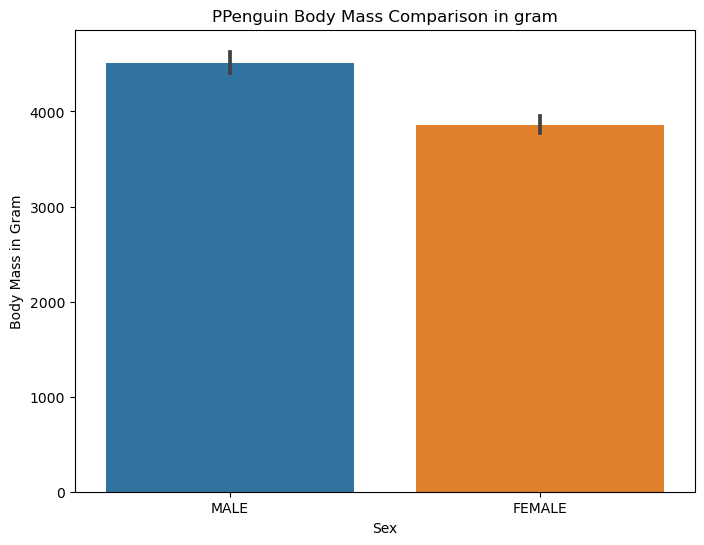

In [8]:
#6
plt.figure(figsize=(8,6))
sns.barplot(x=df['sex'], y=df['body_mass_g'])
plt.title('PPenguin Body Mass Comparison in gram')
plt.xlabel('Sex')
plt.ylabel('Body Mass in Gram')
plt.show

# Explanation : The visualization below shows the comparison between the male and female body mass in gram. From the visualization, we can conclude that the male penguin has more body mass than female.

7. Check unique value of our target variable

In [9]:
#7
df['species'].unique()

# Checking the unique value from species column

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

8. encode categorical columns and display the results

In [10]:
#8
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.head(5)

# Encode the island an sex column.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,0


9. encode the target column and display the results

In [11]:
#9
df['species'] = label_encoder.fit_transform(df['species'])
df.sample(5)

# Encode the species column

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
176,1,1,46.7,17.9,195.0,3300.0,0
262,2,0,45.3,13.7,210.0,4300.0,0
195,1,1,45.5,17.0,196.0,3500.0,0
244,2,0,42.9,13.1,215.0,5000.0,0
334,2,0,46.2,14.1,217.0,4375.0,0


10. create a heatmap to see the correlation and explain the conclusion

<function matplotlib.pyplot.show(close=None, block=None)>

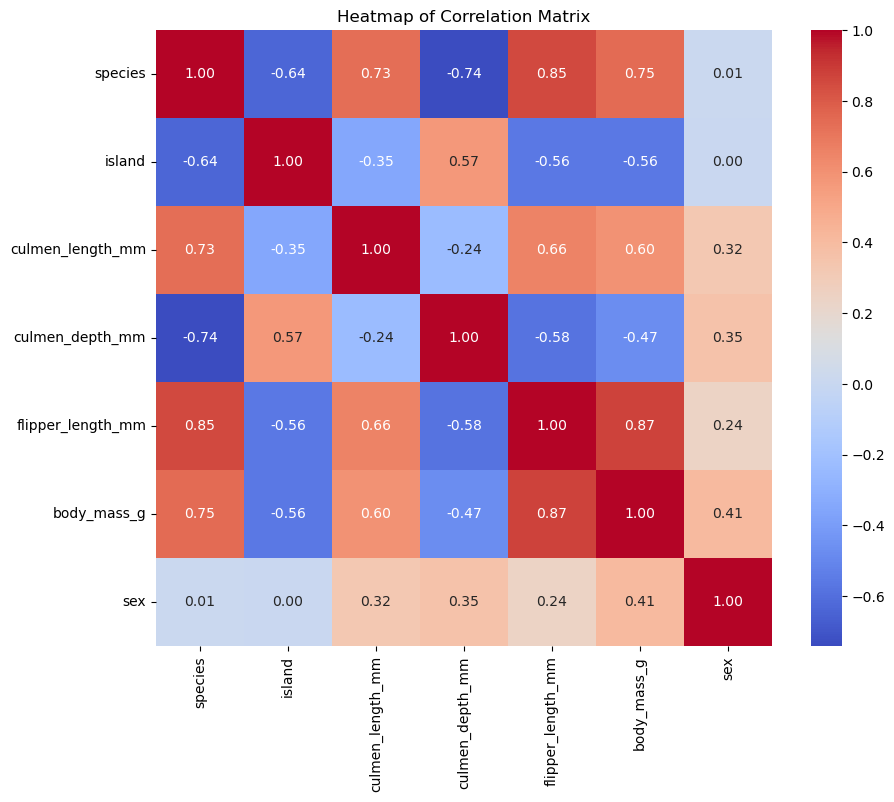

In [12]:
#10
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show

# From the heatmap below, we can see that the strong correlation is between species and culmen length / flipper length / body mass, flipper length and body mass.
# Meanwhile the weak correlation is the rest, We can also conclude that sex is weak correlation compared with all the columns.

## Machine Learning

1. Splitting X and y

In [13]:
#1
X = df.drop(columns = 'species')
y= df['species']

# Splitting the X and y where X is all the columns beside species and y is species column

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [14]:
#2
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Splittng the data into 80% train and 20% test.

In [15]:
#3
print(X_train.shape, X_test.shape)

# Check the result of the train and test.

(275, 6) (69, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [16]:
# a. Defining the model using criterion Entropy

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth= 3, random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [17]:
# b. Predicting the test set results

y_pred_entropy = clf_entropy.predict(X_test)

In [18]:
# c. Check accuracy score

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy with Entropy: {accuracy_entropy:.4f}')

Accuracy with Entropy: 0.9275


In [19]:
# d. Check for overfitting and underfitting

train_set_score_en = clf_entropy.score(X_train, y_train)
test_set_score_en = clf_entropy.score(X_test, y_test)

print(f'Training set score with Entropy : {train_set_score_en}')
print(f'Test set score with Entropy : {test_set_score_en}')

Training set score with Entropy : 0.9709090909090909
Test set score with Entropy : 0.927536231884058


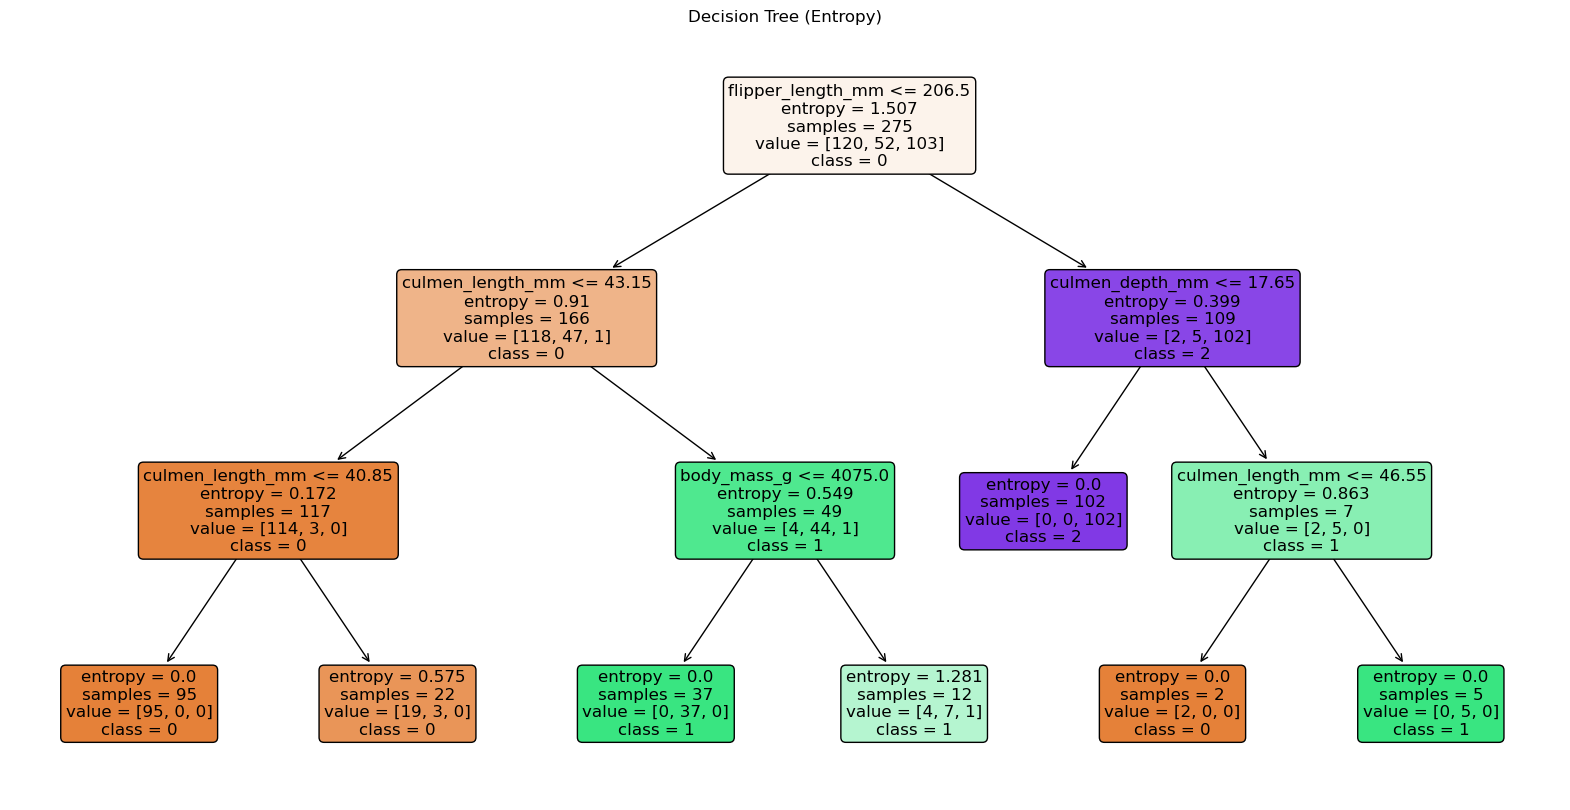

In [20]:
# e. Visualize decisiton trees

plt.figure(figsize=(20, 10))
tree.plot_tree(clf_entropy, 
                filled=True, 
                feature_names=X.columns.tolist(),
                class_names=clf_entropy.classes_.astype(str).tolist(),
                rounded=True, 
                fontsize=12)
plt.title('Decision Tree (Entropy)')
plt.show()

# Change the X and the class names from objects to lists because decisiton tree only accept list. We also need to convert the class_names to string.


2. Criterion Gini index

In [21]:
# a. Defining the model using criterion Gini

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
# b. Predicting the test set results

y_pred_gini = clf_gini.predict(X_test)

In [23]:
# c. Check accuracy score

accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy with Gini : {accuracy_gini:4f}')

Accuracy with Gini : 0.927536


In [24]:
# d. Check for overfitting and underfitting

train_set_score_gini = clf_gini.score(X_train, y_train)
test_set_score_gini = clf_gini.score(X_test, y_test)

print(f'Training set score with Gini : {train_set_score_gini}')
print(f'Test set score with Gini : {test_set_score_gini}')


Training set score with Gini : 0.9709090909090909
Test set score with Gini : 0.927536231884058


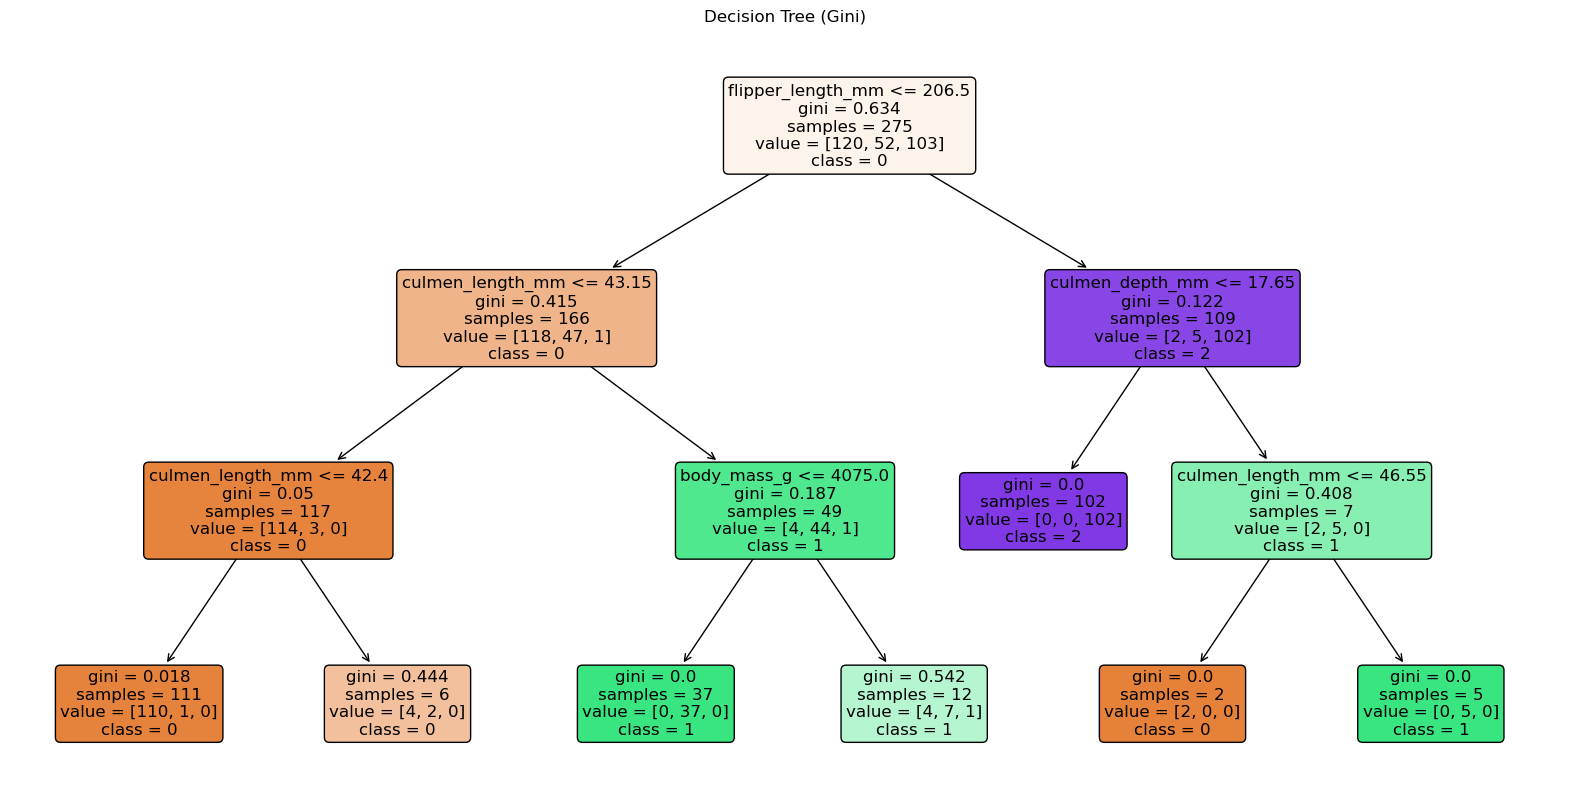

In [25]:
# e. Visualize decisiton trees

plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini, 
                filled=True, 
                feature_names=X.columns.tolist(),
                class_names=clf_gini.classes_.astype(str).tolist(),
                rounded=True, 
                fontsize=12)
plt.title('Decision Tree (Gini)')
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

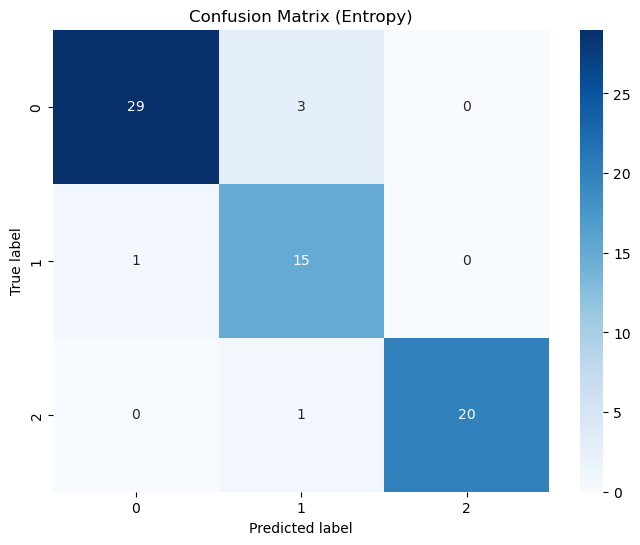

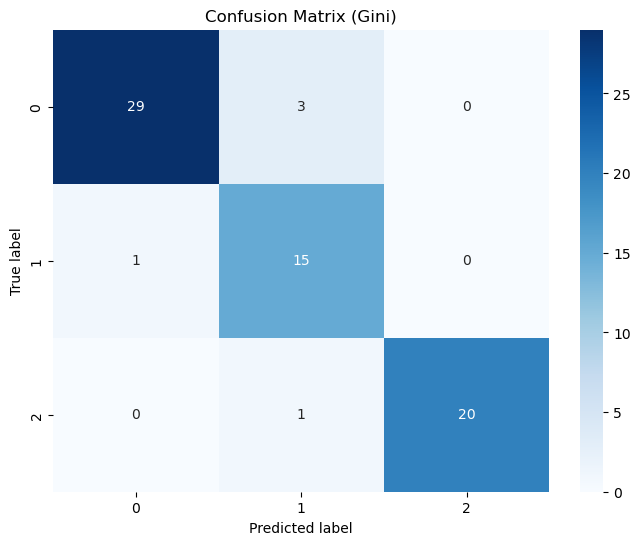

In [26]:
# f. Confusion matrix

cm = confusion_matrix(y_test, y_pred_entropy)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [27]:
# g. Classification report

print('Entropy Classification Report')
print(classification_report(y_test, y_pred_entropy))

print('Gini Classification Report')
print(classification_report(y_test, y_pred_gini))

Entropy Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69

Gini Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [28]:
# h. Results and conclusion
print(f'Accuracy with Entropy: {accuracy_entropy:.4f}')
print(f'Accuracy with Gini: {accuracy_gini:.4f}')
print(f'\nTraining set score with Entropy : {train_set_score_en}')
print(f'Test set score with Entropy : {test_set_score_en}')
print(f'\nTraining set score with Gini : {train_set_score_gini}')
print(f'Test set score with Gini : {test_set_score_gini}')

print(f'\nFrom the data above, we can see that Entropy(96%) is more accurate than Gini(93%). \nFrom the classification report, the precision of class 1 in Gini has lower precision compared to the Entropy, this means that it has more false positive than Entropy.\nFrom the Train and Test set, Entropy model overfits the data shown by training set score is 1.0 but still has high accuracy shown by the test score 95%')


Accuracy with Entropy: 0.9275
Accuracy with Gini: 0.9275

Training set score with Entropy : 0.9709090909090909
Test set score with Entropy : 0.927536231884058

Training set score with Gini : 0.9709090909090909
Test set score with Gini : 0.927536231884058

From the data above, we can see that Entropy(96%) is more accurate than Gini(93%). 
From the classification report, the precision of class 1 in Gini has lower precision compared to the Entropy, this means that it has more false positive than Entropy.
From the Train and Test set, Entropy model overfits the data shown by training set score is 1.0 but still has high accuracy shown by the test score 95%


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [35]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Deifining the model

GaussianNB()

In [36]:
#b
y_pred_nb = nb.predict(X_test)

# Predict the test set results

Accuracy : 0.9710144927536232


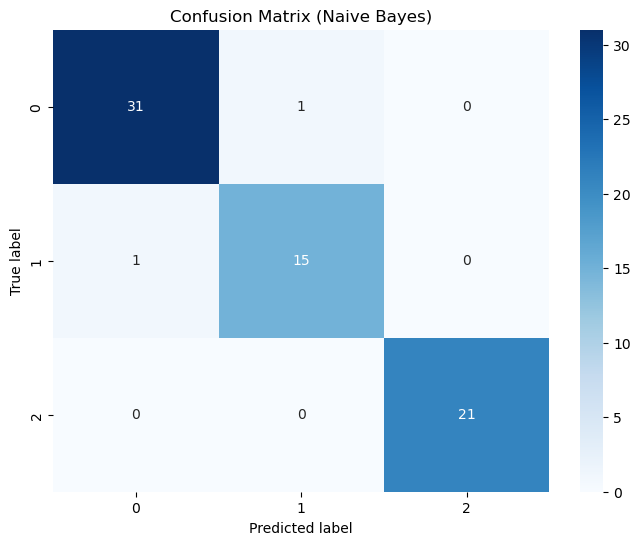

In [44]:
#c
print(f'Accuracy : {accuracy_score(y_test, y_pred_nb)}')

#d
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Check the accuracy of the prediction and print the heatmap to visualize the prediction

In [50]:
#e
print(classification_report(y_test,y_pred_nb))

# Checking the classification report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [33]:
#f

# From the data above, we can conclude that the Naive Bayes model is highly accurate in classifying the data, shown by the model achieved 97% accuracy. 
# The classification report also shows that the 3rd class performs very well. The precision, recall, and f1 score is perfect which is all predictions for class 2 were correct and instance were missclasified.

Good Luck :)